In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_l1_run1 = pd.read_csv('runs/l1_loss/run-2025-06-04_19-54---t1000-img64-lr0.0002-ep15-batch32-sNone-previous0-tag-Loss_train.csv')
df_l1_run2 = pd.read_csv('runs/l1_loss/run-2025-06-08_00-51---t1000-img64-lr0.0002-ep40-batch32-sNone-previous0-tag-Loss_train.csv')
df_l1_run3 = pd.read_csv('runs/l1_loss/run-2025-06-08_23-44---t1000-img64-lr0.0002-ep40-batch32-sNone-previous0-tag-Loss_train.csv')
display(df_l1_run1.head())
display(df_l1_run2.head())
display(df_l1_run3.head())

,Wall time,Step,Value
0,1.749060e+09,0,0.448224
1,1.749060e+09,0,0.277004
2,1.749060e+09,0,0.314580
3,1.749060e+09,0,0.246632
4,1.749060e+09,0,0.212407


,Wall time,Step,Value
0,1.749337e+09,0,0.276990
1,1.749337e+09,0,0.314565
2,1.749337e+09,0,0.212317
3,1.749337e+09,0,0.169092
4,1.749337e+09,0,0.137285


,Wall time,Step,Value
0,1.749419e+09,0,0.276990
1,1.749419e+09,0,0.314564
2,1.749419e+09,0,0.212336
3,1.749419e+09,0,0.169100
4,1.749419e+09,0,0.137333


In [17]:
# Display column names to understand structure
print("Columns in df_l1_run1:", df_l1_run1.columns.tolist())

# Calculate mean of L1 loss for each step across all three runs
# Assuming the dataframes have 'Step' and 'Value' columns based on typical TensorBoard CSV exports
merged_df = pd.DataFrame()

for i, df in enumerate([df_l1_run1, df_l1_run2, df_l1_run3]):
    # Rename Value column to distinguish runs
    df = df.copy()
    df.rename(columns={'Value': f'Run_{i+1}'}, inplace=True)
    
    # If this is the first dataframe, use it as base
    if merged_df.empty:
        merged_df = df[['Step', f'Run_{i+1}']]
    else:
        # Otherwise merge on Step
        merged_df = pd.merge(merged_df, df[['Step', f'Run_{i+1}']], on='Step', how='outer')

# Calculate mean across runs for each step
merged_df['Mean_Loss'] = merged_df[['Run_1', 'Run_2', 'Run_3']].mean(axis=1)
display(merged_df.head())

# Aggregate the data to get the mean and standard deviation for plotting for each step
mean_loss = merged_df.groupby('Step')['Mean_Loss'].mean().reset_index()
std_loss = merged_df.groupby('Step')['Mean_Loss'].std().reset_index()

# Merge mean and std dataframes
loss_stats = pd.merge(mean_loss, std_loss, on='Step', suffixes=('_mean', '_std'))
# Display the first few rows of the aggregated data
display(loss_stats.head())

Columns in df_l1_run1: ['Wall time', 'Step', 'Value']


,Step,Run_1,Run_2,Run_3,Mean_Loss
0,0,0.448224,0.27699,0.276990,0.334068
1,0,0.448224,0.27699,0.314564,0.346593
2,0,0.448224,0.27699,0.212336,0.312516
3,0,0.448224,0.27699,0.169100,0.298104
4,0,0.448224,0.27699,0.137333,0.287515


,Step,Mean_Loss_mean,Mean_Loss_std
0,0,0.115408,0.036282
1,1,0.068088,0.008948
2,2,0.065013,0.008481
3,3,0.073017,0.008753
4,4,0.064220,0.008632


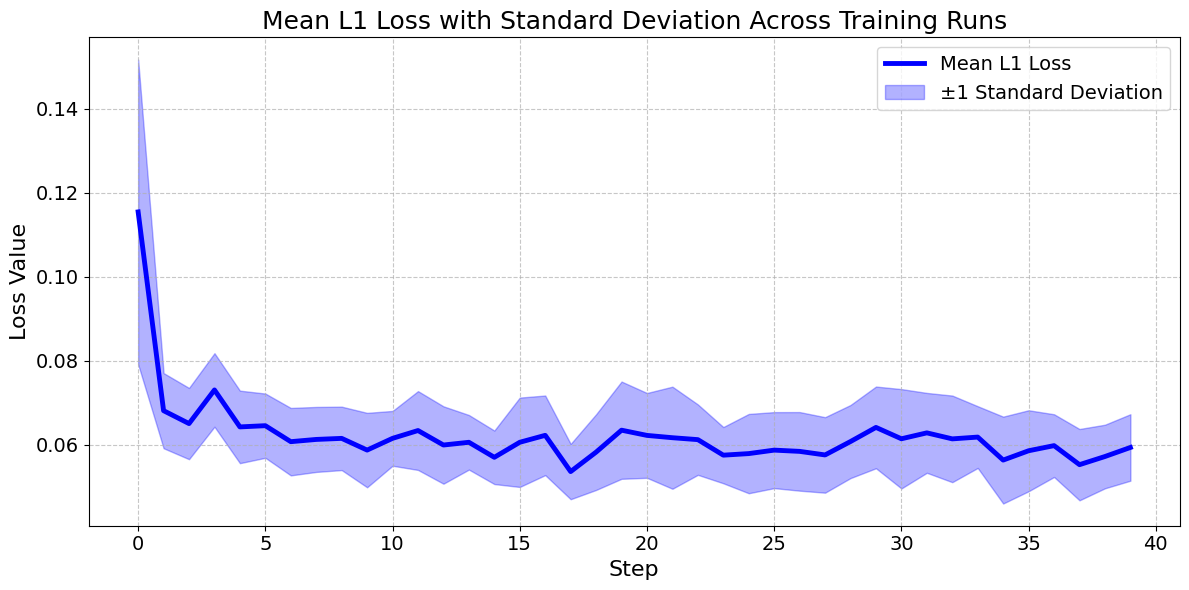

Mean Loss Statistics:
       Mean_Loss_mean  Mean_Loss_std
count       40.000000      40.000000
mean         0.062156       0.009480
std          0.009312       0.004573
min          0.053584       0.006369
25%          0.058505       0.007715
50%          0.060962       0.008904
75%          0.062361       0.009542
max          0.115408       0.036282


In [9]:
# Create a plot showing mean loss and standard deviation over steps
plt.figure(figsize=(12, 6))

# Plot the mean loss
sns.lineplot(x='Step', y='Mean_Loss_mean', data=loss_stats, 
             linewidth=3.5, color='blue', label='Mean L1 Loss')

# Add shaded area for standard deviation
plt.fill_between(loss_stats['Step'], 
                 loss_stats['Mean_Loss_mean'] - loss_stats['Mean_Loss_std'],
                 loss_stats['Mean_Loss_mean'] + loss_stats['Mean_Loss_std'],
                 alpha=0.3, color='blue', label='±1 Standard Deviation')

# Customize plot appearance
plt.title('Mean L1 Loss with Standard Deviation Across Training Runs', fontsize=18)
plt.xlabel('Step', fontsize=16)
plt.ylabel('Loss Value', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Display summary statistics
print("Mean Loss Statistics:")
print(loss_stats[['Mean_Loss_mean', 'Mean_Loss_std']].describe())

# MSE

In [18]:
df_mse_run1 = pd.read_csv('runs/mse_loss/run-2025-06-01_01-14---t1000-img64-lr0.0002-ep40-batch32-sNone-previous0-tag-Loss_train.csv')
df_mse_run2 = pd.read_csv('runs/mse_loss/run-2025-06-02_23-01---t1000-img64-lr0.0002-ep40-batch32-sNone-previous0-tag-Loss_train.csv')
display(df_mse_run1.head())
display(df_mse_run2.head())

# Display column names to understand structure
print("Columns in df_MSE_run1:", df_mse_run1.columns.tolist())

# Calculate mean of MSE loss for each step across all three runs
# Assuming the dataframes have 'Step' and 'Value' columns based on typical TensorBoard CSV exports
merged_df_mse = pd.DataFrame()

for i, df in enumerate([df_mse_run1, df_mse_run2]):
    # Rename Value column to distinguish runs
    df = df.copy()
    df.rename(columns={'Value': f'Run_{i+1}'}, inplace=True)
    
    # If this is the first dataframe, use it as base
    if merged_df_mse.empty:
        merged_df_mse = df[['Step', f'Run_{i+1}']]
    else:
        # Otherwise merge on Step
        merged_df_mse = pd.merge(merged_df_mse, df[['Step', f'Run_{i+1}']], on='Step', how='outer')

# Calculate mean across runs for each step
merged_df_mse['Mean_Loss'] = merged_df_mse[['Run_1', 'Run_2']].mean(axis=1)
display(merged_df_mse.head())

# Aggregate the data to get the mean and standard deviation for plotting for each step
mean_loss = merged_df_mse.groupby('Step')['Mean_Loss'].mean().reset_index()
std_loss = merged_df_mse.groupby('Step')['Mean_Loss'].std().reset_index()

# Merge mean and std dataframes
mse_loss_stats = pd.merge(mean_loss, std_loss, on='Step', suffixes=('_mean', '_std'))
# Display the first few rows of the aggregated data
display(mse_loss_stats.head())

,Wall time,Step,Value
0,1.748733e+09,0,0.154336
1,1.748733e+09,0,0.206916
2,1.748733e+09,0,0.098340
3,1.748733e+09,0,0.077093
4,1.748733e+09,0,0.061503


,Wall time,Step,Value
0,1.748898e+09,0,0.154336
1,1.748898e+09,0,0.206916
2,1.748898e+09,0,0.098340
3,1.748898e+09,0,0.077093
4,1.748898e+09,0,0.061503


Columns in df_MSE_run1: ['Wall time', 'Step', 'Value']


,Step,Run_1,Run_2,Mean_Loss
0,0,0.154336,0.154336,0.154336
1,0,0.154336,0.206916,0.180626
2,0,0.154336,0.098340,0.126338
3,0,0.154336,0.077093,0.115715
4,0,0.154336,0.061503,0.107920


,Step,Mean_Loss_mean,Mean_Loss_std
0,0,0.047342,0.030204
1,1,0.018643,0.006816
2,2,0.017921,0.006722
3,3,0.024229,0.006501
4,4,0.017713,0.006464


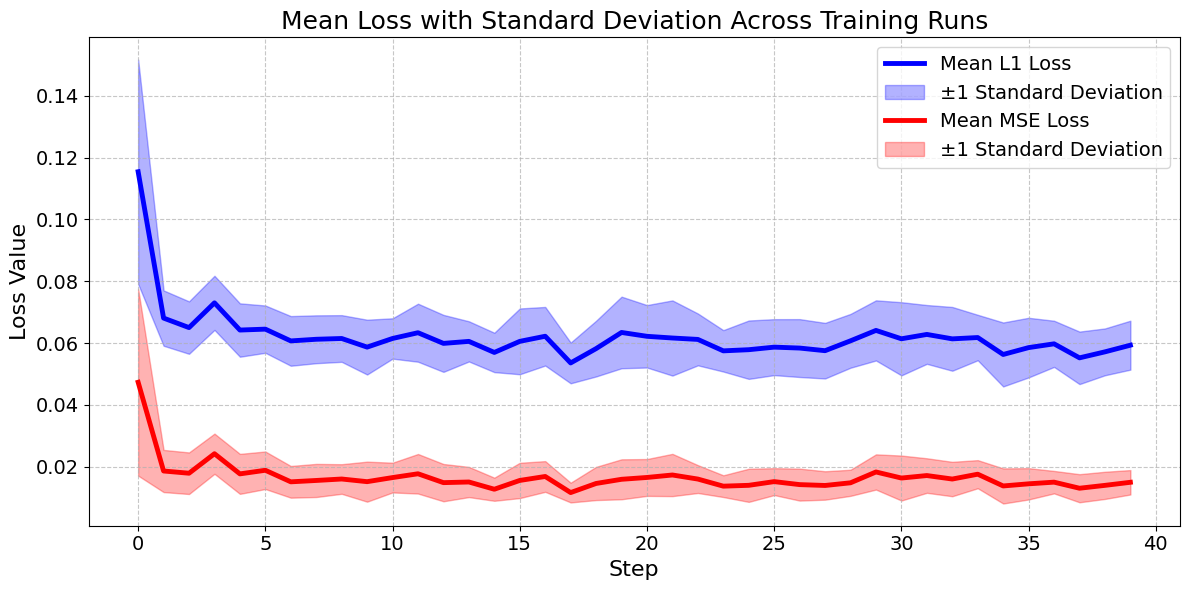

Mean Loss Statistics:
       Mean_Loss_mean  Mean_Loss_std
count       40.000000      40.000000
mean         0.062156       0.009480
std          0.009312       0.004573
min          0.053584       0.006369
25%          0.058505       0.007715
50%          0.060962       0.008904
75%          0.062361       0.009542
max          0.115408       0.036282


In [20]:
# Create a plot showing mean loss and standard deviation over steps
plt.figure(figsize=(12, 6))

# Plot the mean loss
sns.lineplot(x='Step', y='Mean_Loss_mean', data=loss_stats, 
             linewidth=3.5, color='blue', label='Mean L1 Loss')

# Add shaded area for standard deviation
plt.fill_between(loss_stats['Step'], 
                 loss_stats['Mean_Loss_mean'] - loss_stats['Mean_Loss_std'],
                 loss_stats['Mean_Loss_mean'] + loss_stats['Mean_Loss_std'],
                 alpha=0.3, color='blue', label='±1 Standard Deviation')
# Plot the mean loss
sns.lineplot(x='Step', y='Mean_Loss_mean', data=mse_loss_stats, 
             linewidth=3.5, color='red', label='Mean MSE Loss')

# Add shaded area for standard deviation
plt.fill_between(mse_loss_stats['Step'], 
                 mse_loss_stats['Mean_Loss_mean'] - mse_loss_stats['Mean_Loss_std'],
                 mse_loss_stats['Mean_Loss_mean'] + mse_loss_stats['Mean_Loss_std'],
                 alpha=0.3, color='red', label='±1 Standard Deviation')
# Customize plot appearance
plt.title('Mean Loss with Standard Deviation Across Training Runs', fontsize=18)
plt.xlabel('Step', fontsize=16)
plt.ylabel('Loss Value', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Display summary statistics
print("Mean Loss Statistics:")
print(loss_stats[['Mean_Loss_mean', 'Mean_Loss_std']].describe())